<a href="https://colab.research.google.com/github/MonalSD/ML/blob/main/Notes%2BNaiveBayesClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INTRODUCTION TO BAYES THEOREM

Bayes Theorem defines probability of an event based on the prior knowledge of factors that might be related to an event.

#### Mathematical Statement of Bayes Theorem is as follows :

# ![title](bayestheorem.png)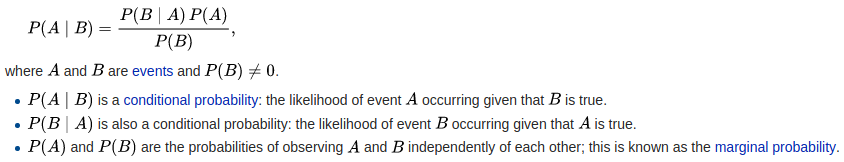

Now, basically  for a data point xi, we have to predict the class that the current output Y belongs to. Assume, there are total 'j' number of classes for output.<br/>
Then, <br/>
P(y=c1|x=xi) ---> tells us that for given input xi what is the probability that y is c1. <br/>
P(y=c2|x=xi) ---> tells us that for given input xi what is the probability that y is c2. <br/>
and so on till cj. <br/><br/>

Out of all these probabilities calculations, y belongs to that particular class which has maximum probability.

We will be using Bayes theorem to doing these probability calculations. <br/>

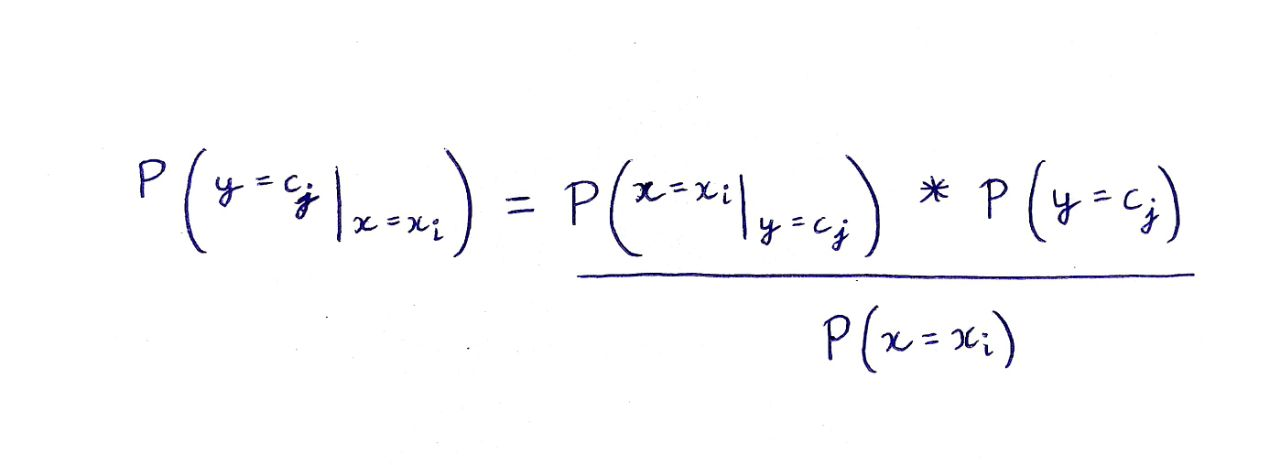![title](1nb.png)

This gives us the probability that the output belongs to jth class for the current values of data point(xi). <br/>
Since for all the classes 1,2,...,j the denominator will have the same value, so we can ignore this while doing comparison. Hence, we obtain the given formula to calculate probabilities.

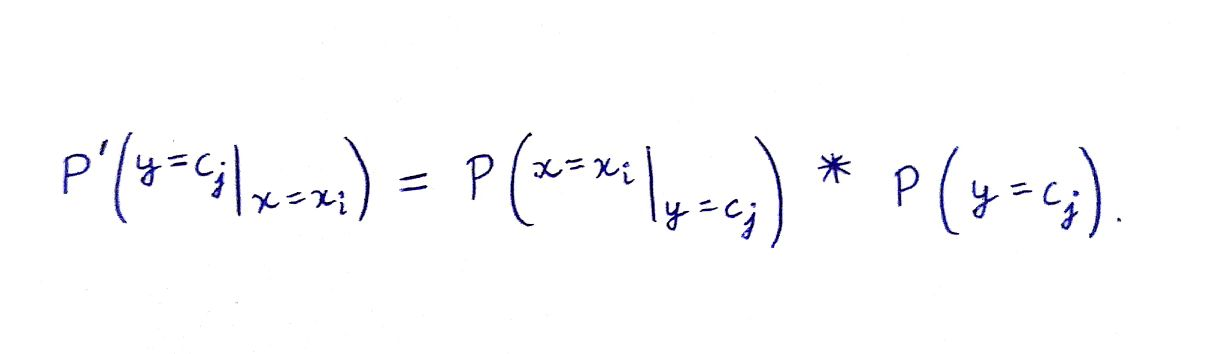![title](2nb.png)

### NAIVE ASSUMPTION 

The estimate for probability P(y=cj), can be done directly from the number of training points. <br/>
Suppose there are 100 training points and 3 output classes, 10 belong to class c1, 30 belong to class C2 and remaining 60 belong to class C3. <br/>
The estimate values of class probabilities will be : <br/>
P(y = C1) = 10/100 = 0.1 <br/>
P(y = C2) = 30/100 = 0.3 <br/>
P(y = C3) = 60/100 = 0.6 <br/>

To make the probability estimate for P(x=xi|y=cj), naive bayes classification algorithm assumes <b>all the features to be independent</b>. So, we can calculate this by individually multiplying the probabilities obtained for all these features (assuming features to be independent), for the output of jth class.

P(x=xi|y=cj) = P(x=xi<sup>1</sup>|y=cj) P(x=xi<sup>2</sup>|y=cj) .... P(x=xi<sup>n</sup>|y=cj)

here, xi<sup>1</sup> denotes the value of 1st feature of ith data point and x=xi<sup>n</sup> denotes the value nth feature of the ith data point.

After taking up the naive assumption, we can easily calculate the individual probabilites and then by simply multiplying the result calculate the final probability P'.

# ![title](3nb.png)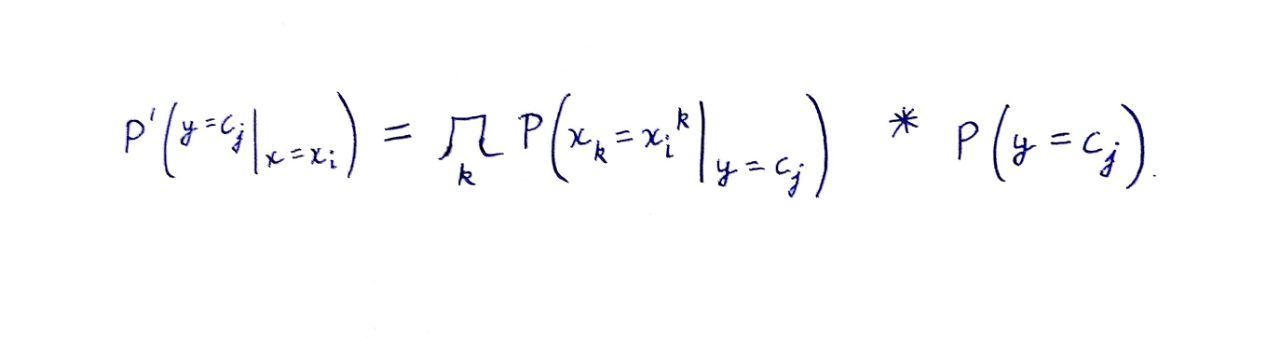

### ESTIMATE PROBABILITIES USING TRAINING DATA (TAKING DISCRETE VALUE FEATURES)

Using the above formula, we can calculate the probability that the output y belongs to jth class, for the given ith data point. Class probabilites [ P(y = cj) ] will be calculated from the data given and and individual probabilties [ P(x=xi<sup>k</sup>|y = cj) ] will be calculated by diving the data class wise can calculating these for the jth class.  

## Handling zeroes using Laplace correction

Let’s consider the following situation: you’ve trained a Naive Bayes algorithm to differentiate between spam and not spam mails. What happens if the word “Casino” doesn’t show up in your training data set, but appears in a test sample?

Well, your algorithm has never seen it before, so it sets the probability that <b>"Casino" appears in a spam document</b> to <b>0</b>; So every time this word appears in the test data , you will try hard (it has P = 0) to mark it as not spam just because you have not seen that word in the spam part of training data.This will make the model very less efficient and thus we want to minimise it. We want to keep in mind the possibility of any word we have not seen (or for that matter seen in the not-spam part of training data), may have a probability of being a word used in spam mails greater than 0. Ths same is true for each word to be a part of not-spam mails. 

To avoid such issues with unseen values for features, as well as to combat overfitting to the data set, we pretend as if we’ve seen each word 1 (or k, if you’re smoothing by k) time more than we’ve actually seen it, and adjust the denominator of our frequency divisions by the size of the overall vocabulary to account for the “pretence”, which actually works well in practice.

If you take smoothing factor k equal to 1 , it becomes Laplace correction.
The equations below show Laplace correction for the example taken.
<br>Without correction : 
<img src="L_corr.png">
With correction :
<img src="L_corr1.png" width="400px">

### FIND PROBABILITIES FOR CONTINUOUS VALUE FEATURES

For all the continuous value features, we take the distribution to be GAUSSIAN. <br/>
When Gaussian distribution is used for continuous data, then it is called GAUSSIAN NAIVE BAYES CLASSIFIER. Other types of classifiers are BERNOULLI, MULTINOMIAL, etc. <br/>
Given standard formula is used to find the probability estimates for continuous data, as shown.

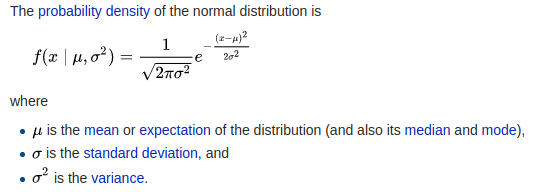![title](normaldistribution.png)

# ![title](normaldistributiongraph.png)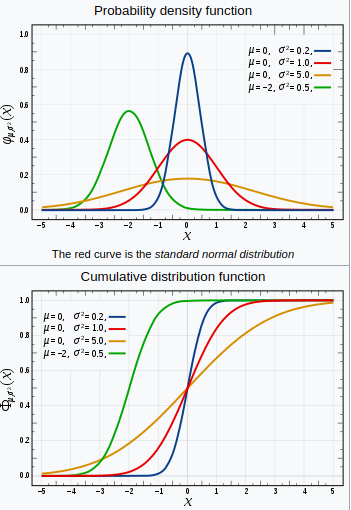

### SKLEARN FOR NAIVE BAYES CLASSIFICATION

In [ ]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
# The sklearn.naive_bayes module implements Naive Bayes algorithms.
# These are supervised learning methods based on applying Bayes’ theorem 
## with strong (naive) feature independence assumptions.
from sklearn import naive_bayes

In [ ]:
iris = datasets.load_iris()

In [ ]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
gnb = naive_bayes.GaussianNB() # GAUSSIAN NAIVE BAYES CLASSIFIER

In [ ]:
gnb.fit(iris.data, iris.target)

GaussianNB(priors=None)

In [ ]:
y_pred = gnb.predict(iris.data)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
np.unique(y_pred, return_counts = True)

(array([0, 1, 2]), array([50, 50, 50]))

In [ ]:
print("CONFUSION MATRIX")
print()
print(confusion_matrix(iris.target, y_pred))

# iris.target - true value - shown horizontally in confusion matrix
# y_pred - predicted values - shown vertically in confusion matrix

CONFUSION MATRIX

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]
